# Biomodel SBML statistics
- Models are 31th Biomodels Release
- https://www.ebi.ac.uk/biomodels/content/news/biomodels-release-26th-june-2017

In [3]:
import pandas as pd

In [5]:
df_curated = pd.read_csv("./statistics/R31_2017-06-26_curated.tsv", sep="\t")
df_curated["curated"] = 1
df_curated_stat = df_curated.describe()
df_curated_stat.to_csv("./results/r31_curated_stat.tsv", sep="\t")

df_uncurated = pd.read_csv("./statistics/R31_2017-06-26_non_curated.tsv", sep="\t")
df_uncurated["curated"] = 0
df_uncurated_stat = df_uncurated.describe()
df_uncurated_stat.to_csv("./results/r31_uncurated_stat.tsv", sep="\t")

df_all = pd.concat([df_curated, df_uncurated])
df_all_stat = df_all.describe()
df_all_stat.to_csv("./results/r31_all_stat.tsv", sep="\t")

In [6]:
import seaborn as sns
sns.set(style="ticks")

In [7]:
cols = ["function_definitions", "unit_definitions",
                 "compartments", "species", "reactions", "kinetic_laws", 
                 "parameters", "parameters_local",
                 "initial_assignments", "rules", "events", "math", "curated"]

/home/mkoenig/envs/sbmlutils/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mkoenig/envs/sbmlutils/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


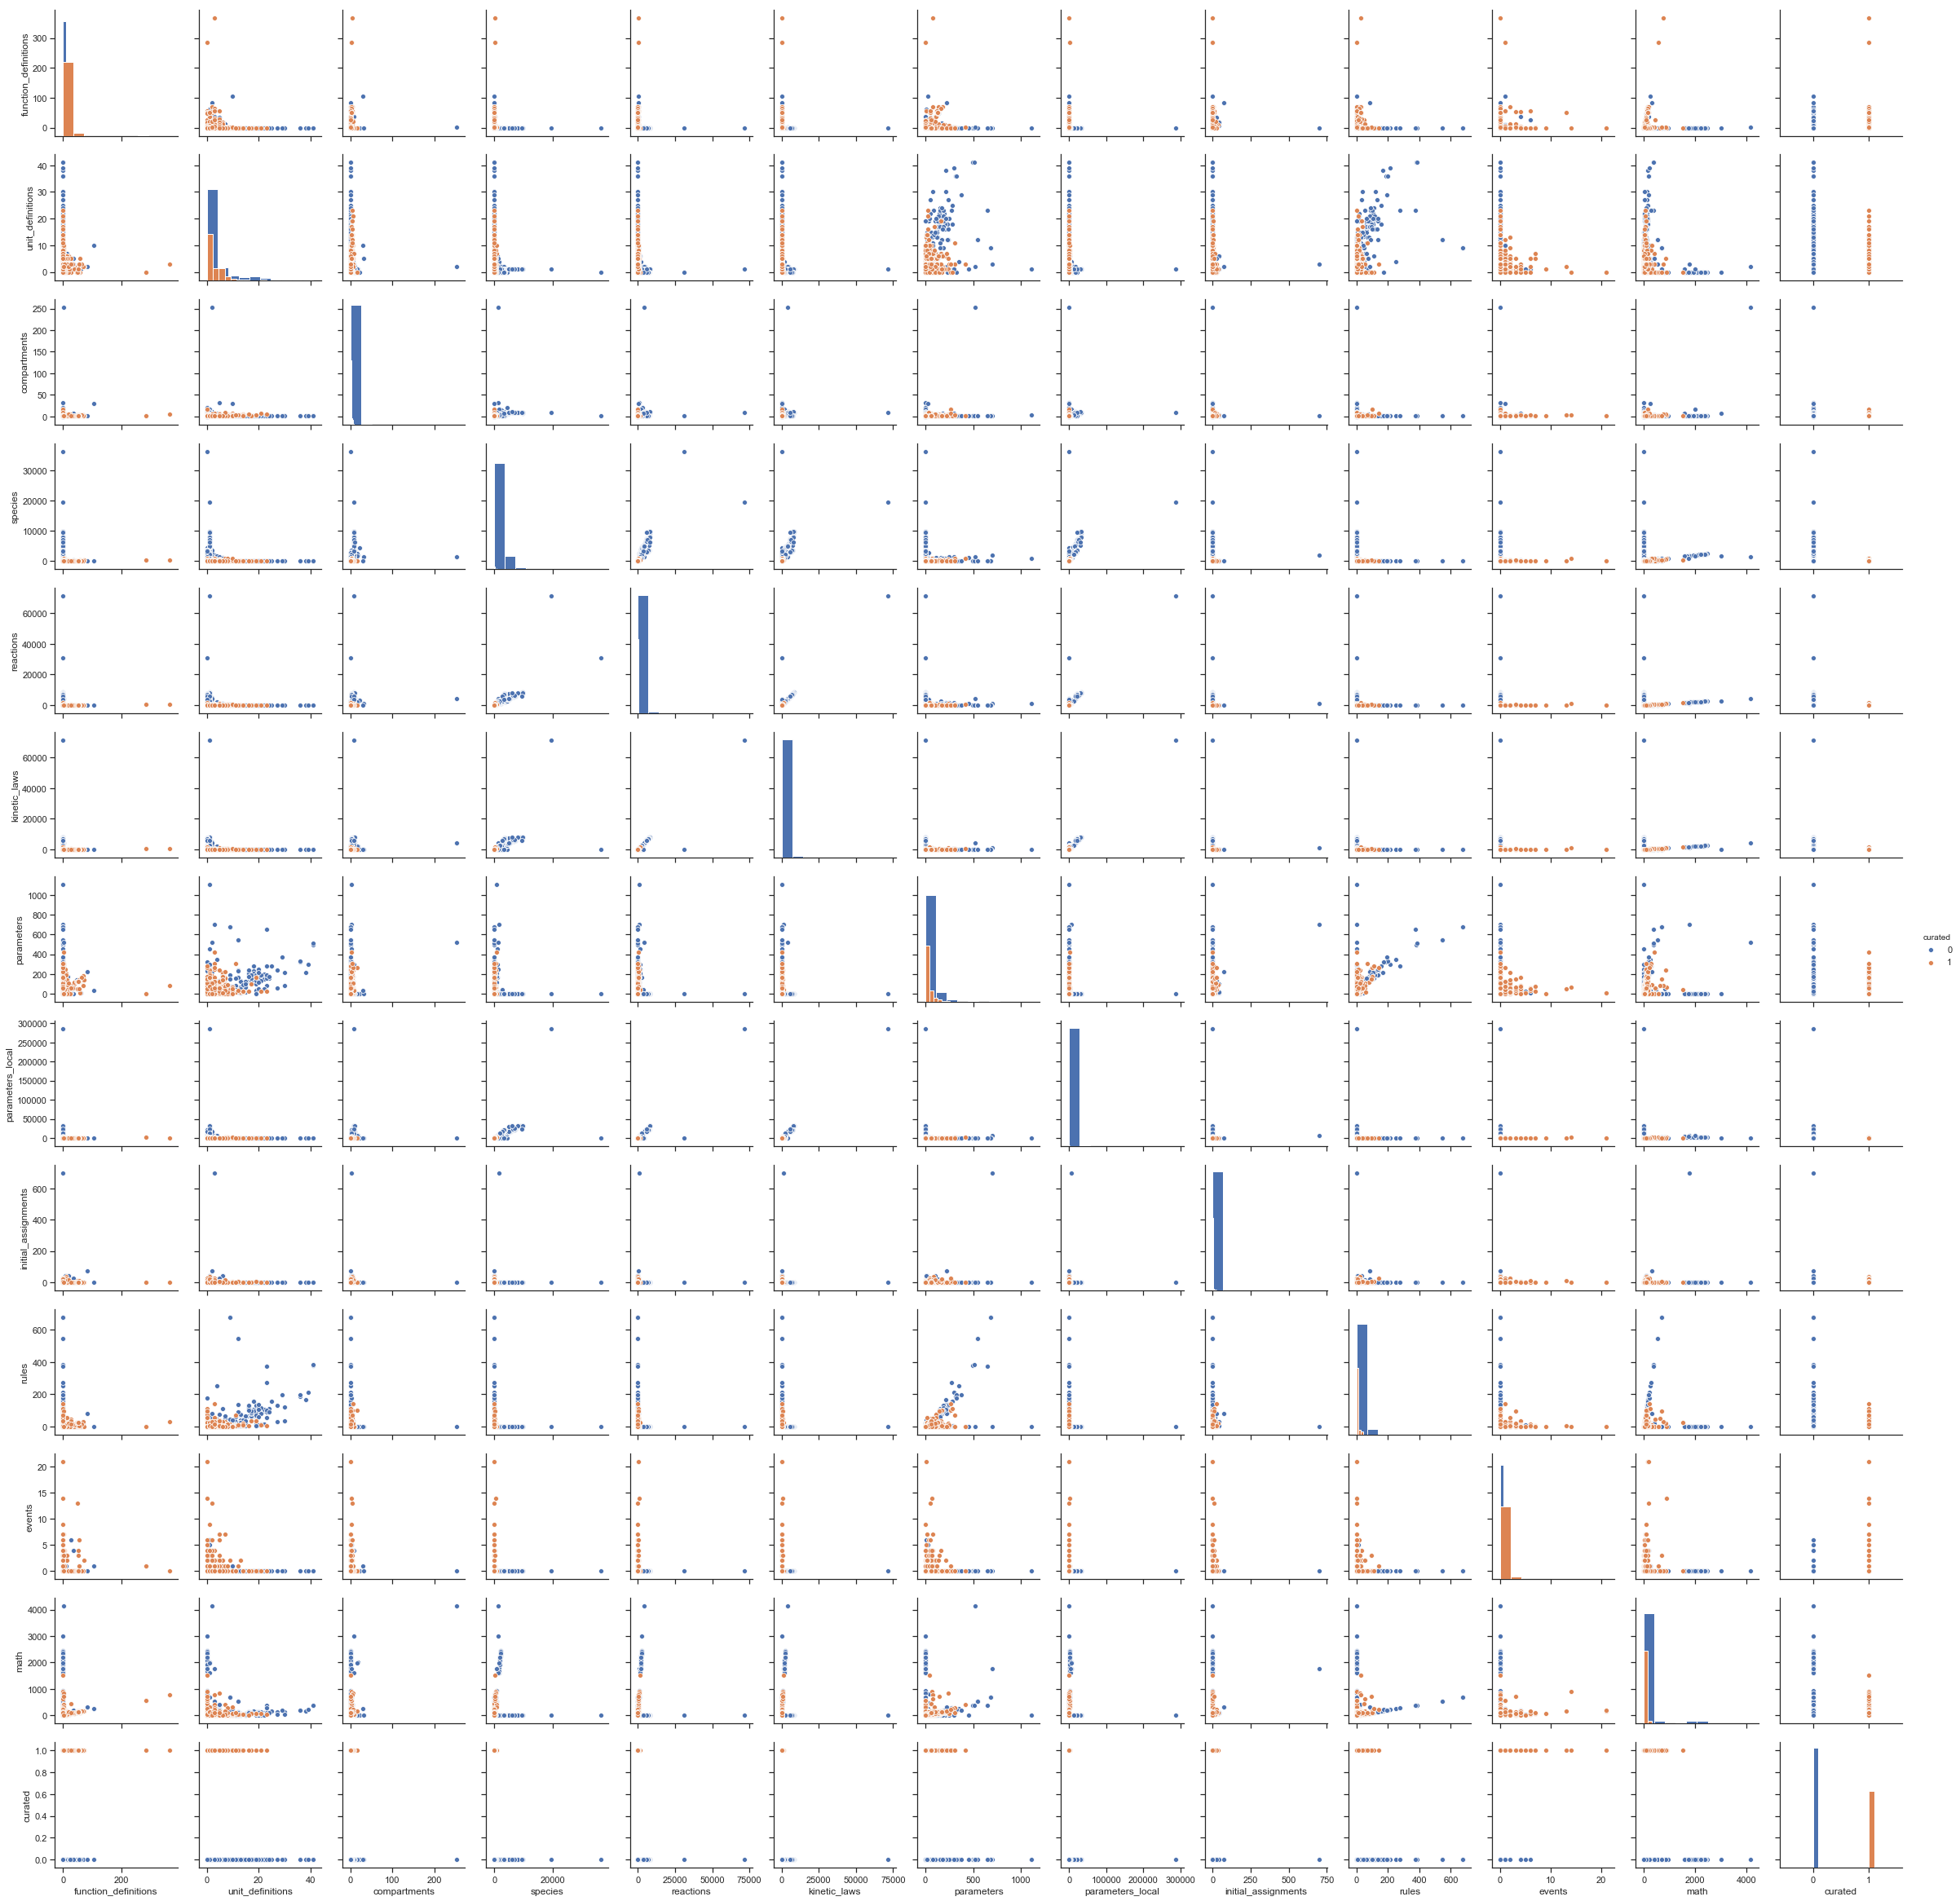

In [8]:
ax = sns.pairplot(df_all[cols], diag_kind="hist", hue="curated")
ax.savefig("./figures/math_analysis_01.png")

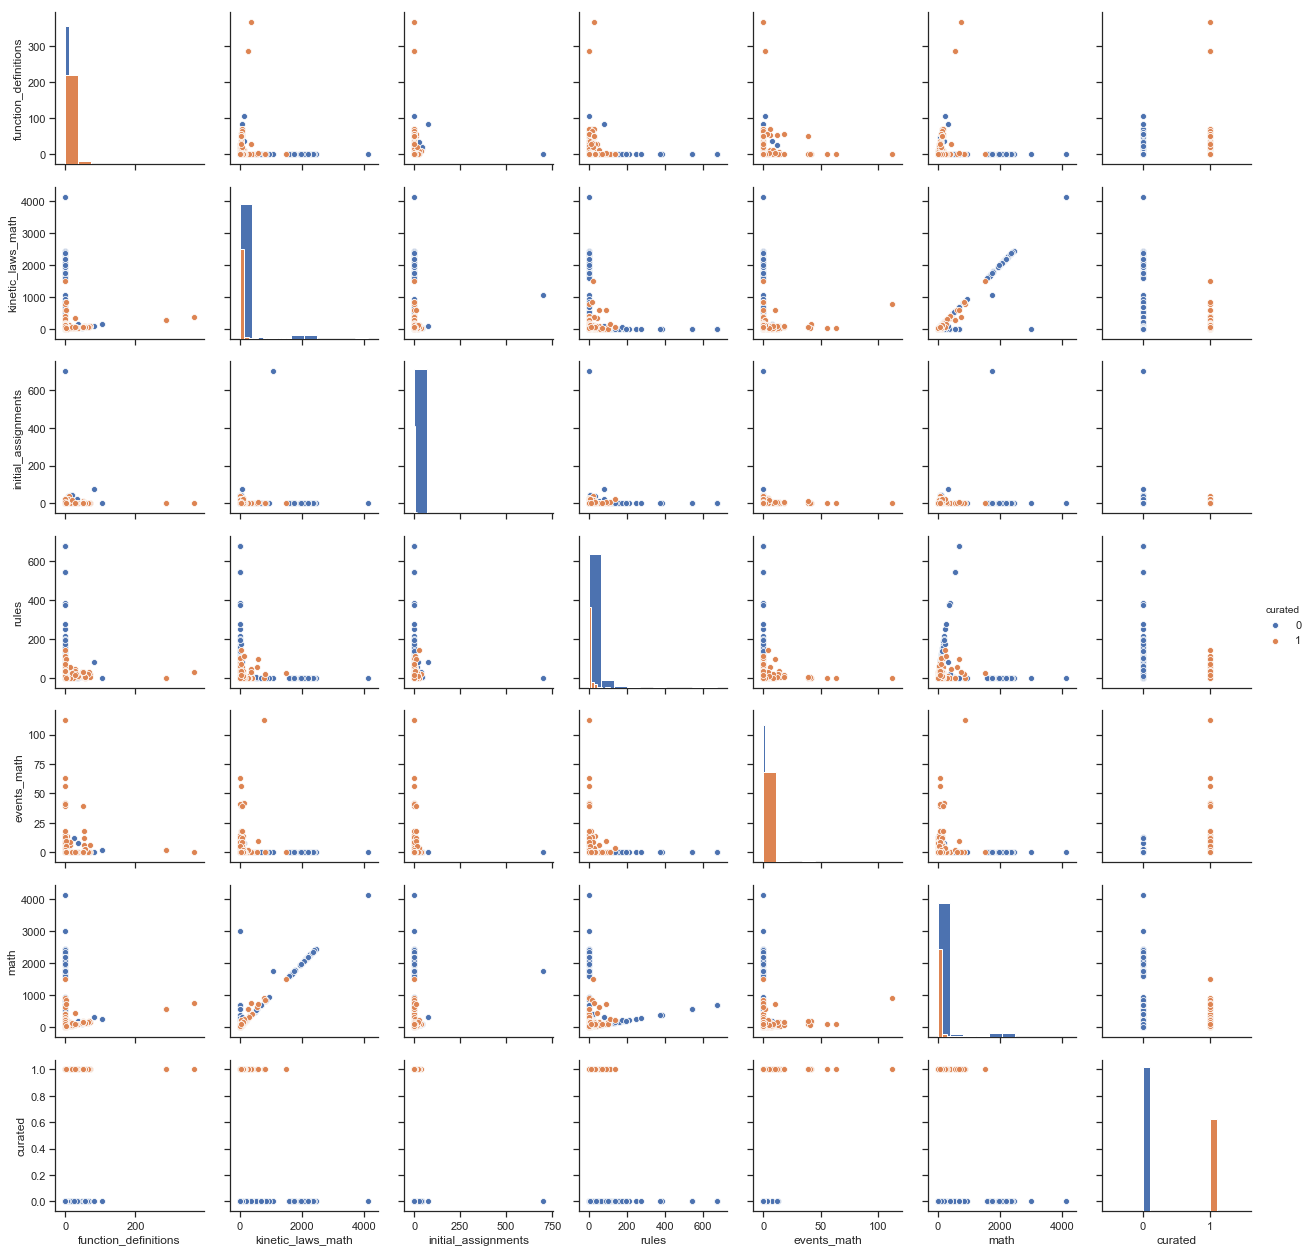

In [9]:
cols = ["function_definitions", "kinetic_laws_math", "initial_assignments", "rules", "events_math", "math", "curated"]
ax = sns.pairplot(df_all[cols], diag_kind="hist", hue="curated")

In [91]:
for key, df in {"curated": df_curated, "uncurated": df_uncurated, "all": df_all}.items():
    print("-"*80)
    print(key)
    print("Q50%={:.2f}, mean={:.2f}, std={:.2f}".format(df.math.quantile(q=0.5), df.math.mean(), df.math.std()))

--------------------------------------------------------------------------------
curated
Q50%=21.00, mean=50.37, std=106.01
--------------------------------------------------------------------------------
uncurated
Q50%=7.00, mean=154.57, std=484.12
--------------------------------------------------------------------------------
all
Q50%=15.00, mean=113.88, std=387.00
